In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)

In [201]:
#(1)
df= pd.read_csv('insurance.csv')

In [89]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [57]:
df.shape

(1338, 7)

In [58]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   category
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 37.3 KB


In [60]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [224]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [225]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [226]:
df['age'].nunique()

47

In [227]:
df['bmi'].nunique()

548

In [228]:
df['children'].nunique()

6

In [229]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [205]:
df['sex']=categorical_df['sex_enc']
df['region']=categorical_df['region_enc']
df['children']=categorical_df['children_enc']
df['smoker']=categorical_df['smoker_enc']

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int8   
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int8   
 4   smoker    1338 non-null   int8   
 5   region    1338 non-null   int8   
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(1), int8(4)
memory usage: 36.7 KB


In [232]:
#2 filter method
cor=df.corr()
cor_target=abs(cor['charges'])
relevant_features=cor_target[cor_target>0.5]
relevant_features

smoker     0.787251
charges    1.000000
Name: charges, dtype: float64

There is a correlation smoker only

In [233]:
# (b)wrapper method
cols= list(X.columns)
pmax=1
while(len(cols)>0):
    p=[]
    X_1=X[cols]
    X_1=sm.add_constant(X_1)
    model=sm.OLS(y, X_1).fit()
    p= pd.Series(model.pvalues.values[1:], index=cols)
    pmax=max(p)
    feature_with_pmax=p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_pmax)
    else:
        break
selected_features_BE= cols
print(selected_features_BE)

['age', 'bmi', 'children', 'smoker', 'region']


Here backward elimination has taken all the features except sex

In [234]:
#(c) embedded method
from sklearn.linear_model import LassoCV
reg=LassoCV()
reg.fit(X, y)
print('Best alpha using built-in LassoCV: %f' %reg.alpha_)
print('Best score using built-in LassoCV: %f' % reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 50.836779
Best score using built-in LassoCV: 0.750572


In [235]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 5 variables and eliminated the other 1 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

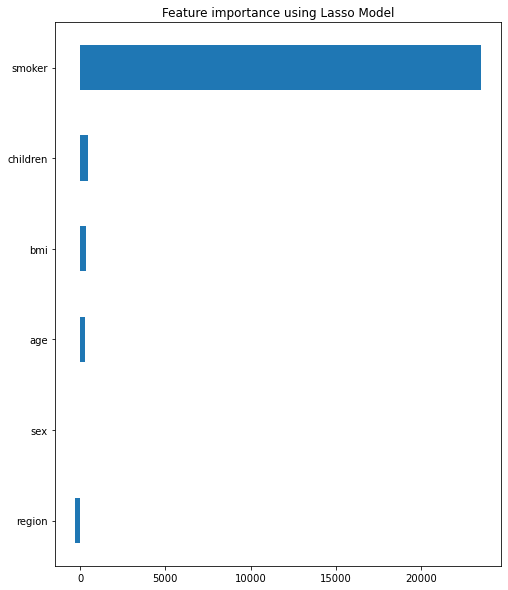

In [236]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Here Lasso model has taken all the features except sex.

In [237]:
df.dtypes

age           int64
sex            int8
bmi         float64
children       int8
smoker         int8
region         int8
charges     float64
dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

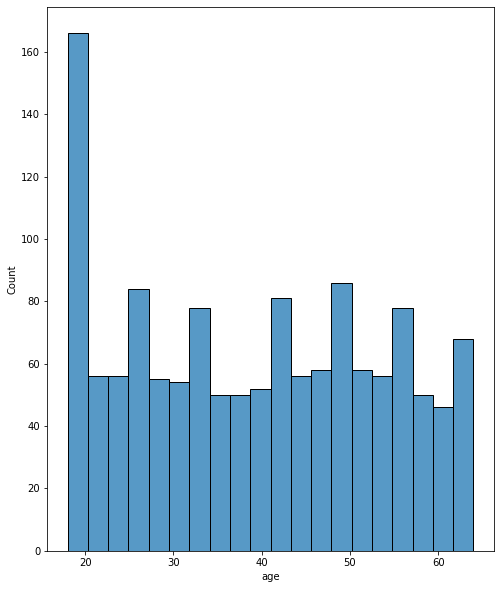

<Figure size 1800x1080 with 0 Axes>

In [238]:
# (3)
sns.histplot(data=df, x='age', bins=20)
plt.figure(figsize=[25,15])
plt.show

The distribution is not normal.
People in their earll 20's are the most.
The rest of the ages upto 60 are more or less the same but past 60 the number reduces

In [237]:
#(4)
numerical_discrete=df[['children']]
numerical_continuous=df[['age','bmi']]

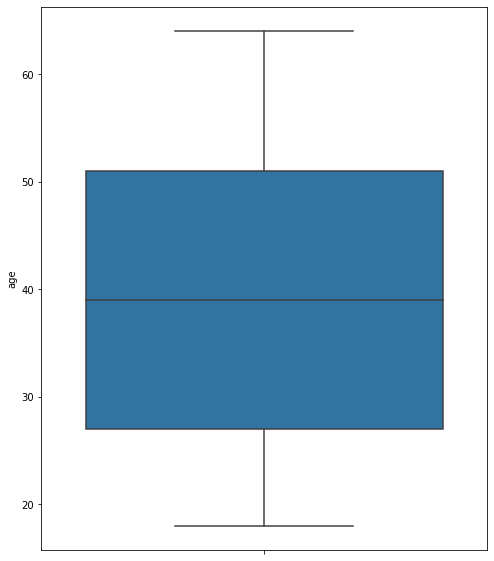

In [239]:
#(5)
sns.boxplot(data=df, y='age')

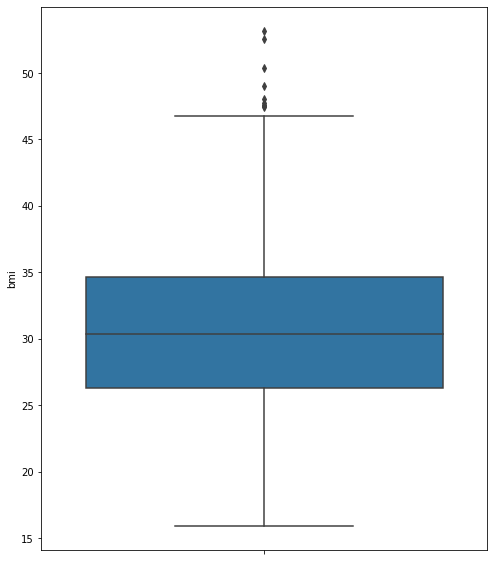

In [240]:
sns.boxplot(data=df, y='bmi')

In [100]:
#(5)
mean = df.bmi.mean()
std = df.bmi.std()
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is 30.663396860986538
std. deviation is 6.098186911679017


In [101]:
df['zscore']=(df.bmi-df.bmi.mean())/df.bmi.std()

In [102]:
df

,age,sex,bmi,children,smoker,region,charges,zscore
0,19,female,27.900,0,yes,southwest,16884.92400,-0.453151
1,18,male,33.770,1,no,southeast,1725.55230,0.509431
2,28,male,33.000,3,no,southeast,4449.46200,0.383164
3,33,male,22.705,0,no,northwest,21984.47061,-1.305043
4,32,male,28.880,0,no,northwest,3866.85520,-0.292447
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.050278
1334,18,female,31.920,0,no,northeast,2205.98080,0.206062
1335,18,female,36.850,0,no,southeast,1629.83350,1.014499
1336,21,female,25.800,0,no,southwest,2007.94500,-0.797515


In [103]:
df=df[(df.zscore<2) & (df.zscore>-2)]

In [104]:
df.shape

(1281, 8)

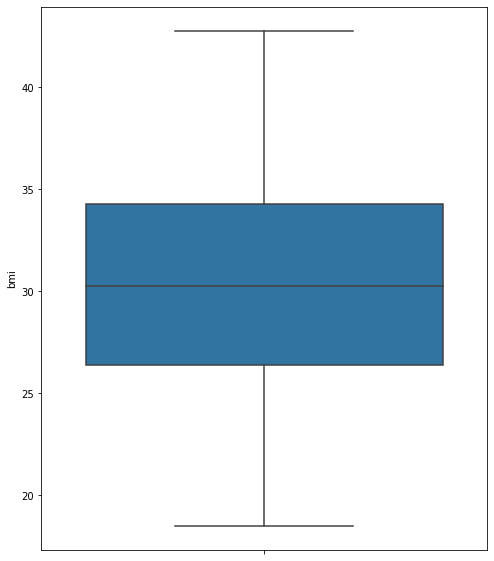

In [250]:
#(6)
sns.boxplot(data=df, y='bmi')

In [105]:
df=df.drop(['zscore'], axis=1)

In [206]:
#(7)
df['sex']=df['sex'].astype('category')
df['region']=df['region'].astype('category')
df['children']=df['children'].astype('category')
df['smoker']=df['smoker'].astype('category')

In [207]:
df.dtypes

age            int64
sex         category
bmi          float64
children    category
smoker      category
region      category
charges      float64
dtype: object

In [204]:
categorical_df=df.drop(['bmi', 'charges', 'age'], axis=1)
categorical_df['sex_enc']=categorical_df['sex'].cat.codes
categorical_df['region_enc']=categorical_df['region'].cat.codes
categorical_df['children_enc']=categorical_df['children'].cat.codes
categorical_df['smoker_enc']=categorical_df['smoker'].cat.codes


In [153]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


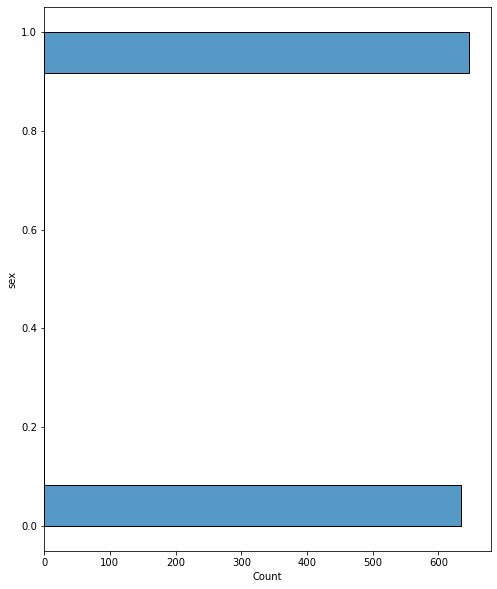

In [254]:
#(8)
sns.histplot(data=df, y='sex')

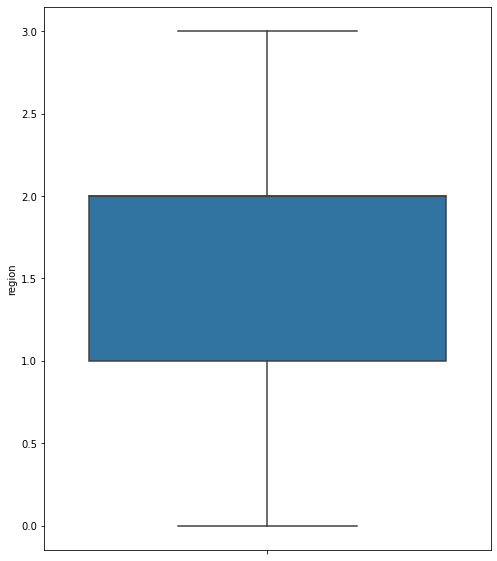

In [256]:
sns.boxplot(data=df, y='region')

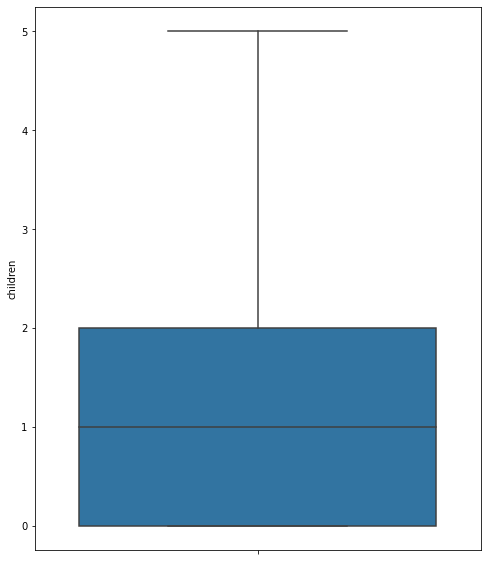

In [259]:
sns.boxplot(data=df, y='children')

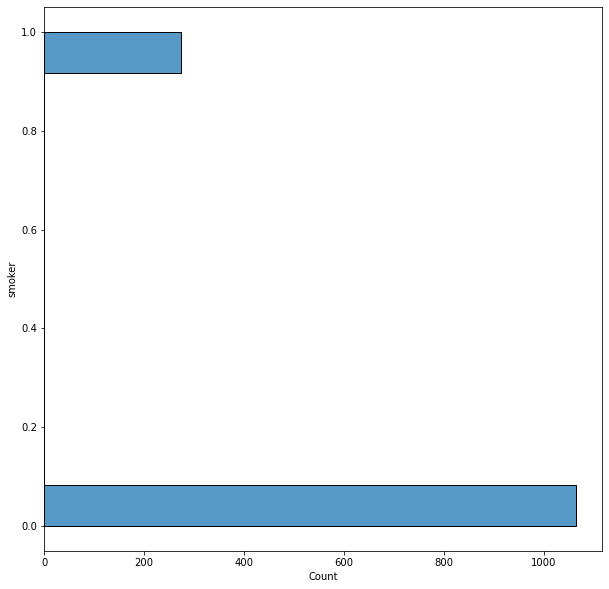

In [12]:
sns.histplot(data=df, y='smoker')

In [122]:
categorical_columns=df.drop(['bmi', 'charges', 'age'], axis=1)
categorical_columns

,sex,children,smoker,region
0,0,0,1,3
1,1,1,0,2
2,1,3,0,2
3,1,0,0,1
4,1,0,0,1
...,...,...,...,...
1333,1,3,0,1
1334,0,0,0,0
1335,0,0,0,2
1336,0,0,0,3


In [141]:
#(9)
from scipy.stats import chi2_contingency
chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(df['charges'], df[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical_columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

                                              Column  \
0       sex children smoker region
0      0      ...   

                                          Hypothesis  
0  [Reject Null Hypothesis, Reject Null Hypothesi...  


No categorical outliers

In [ ]:
#10

The features chosen are age, children, smoker, region and bmi. Sex has no correlation with the target

In [208]:
#(1)
log_df=df[['charges']]
log_df['charges_transform']=(df[['charges']]+1).transform(np.log)
log_df

<ipython-input-208-48f9905f0eb1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['charges_transform']=(df[['charges']]+1).transform(np.log)


,charges,charges_transform
0,16884.92400,9.734236
1,1725.55230,7.453882
2,4449.46200,8.400763
3,21984.47061,9.998137
4,3866.85520,8.260455
...,...,...
1333,10600.54830,9.268755
1334,2205.98080,7.699381
1335,1629.83350,7.396847
1336,2007.94500,7.605365


In [209]:
log_df_age=df[['age']]
log_df_age['age_transform']=(df[['age']]+1).transform(np.log)
log_df_age

<ipython-input-209-fd4a6ddfe334>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df_age['age_transform']=(df[['age']]+1).transform(np.log)


,age,age_transform
0,19,2.995732
1,18,2.944439
2,28,3.367296
3,33,3.526361
4,32,3.496508
...,...,...
1333,50,3.931826
1334,18,2.944439
1335,18,2.944439
1336,21,3.091042


In [210]:
log_df_bmi=df[['bmi']]
log_df_bmi['bmi_transform']=(df[['bmi']]+1).transform(np.log)
log_df_bmi

<ipython-input-210-ef5713a33b42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df_bmi['bmi_transform']=(df[['bmi']]+1).transform(np.log)


,bmi,bmi_transform
0,27.900,3.363842
1,33.770,3.548755
2,33.000,3.526361
3,22.705,3.165686
4,28.880,3.397189
...,...,...
1333,30.970,3.464798
1334,31.920,3.494080
1335,36.850,3.633631
1336,25.800,3.288402


In [211]:
df['charges']=log_df['charges_transform']
df[['age']]=log_df_age['age_transform']
df[['bmi']]=log_df_bmi['bmi_transform']

The transformation makes the data more normally distributed.
It helps to reduce the impact of outliers

In [212]:
#(2)
X=df.drop(['charges', 'sex'], axis=1)
y=df['charges']
X

,age,bmi,children,smoker,region
0,2.995732,3.363842,0,1,3
1,2.944439,3.548755,1,0,2
2,3.367296,3.526361,3,0,2
3,3.526361,3.165686,0,0,1
4,3.496508,3.397189,0,0,1
...,...,...,...,...,...
1333,3.931826,3.464798,3,0,1
1334,2.944439,3.494080,0,0,0
1335,2.944439,3.633631,0,0,2
1336,3.091042,3.288402,0,0,3


In [213]:
from sklearn.preprocessing import Normalizer
scaler=Normalizer().fit(X_train)
normalized_x=scaler.transform(X_train)
normalized_x_test= scaler.transform(X_test)

In [214]:
#(3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 5), (268, 5), (1070,), (268,))

In [215]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1281 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1281 non-null   int64   
 1   sex       1281 non-null   category
 2   bmi       1281 non-null   int64   
 3   children  1281 non-null   category
 4   smoker    1281 non-null   category
 5   region    1281 non-null   category
 6   charges   1281 non-null   int64   
dtypes: category(4), int64(3)
memory usage: 45.6 KB


In [216]:
model=Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.800353283099982

In [217]:
model_l=LinearRegression(normalize=True)
model_l.fit(X_train, y_train)
model_l.score(X_test, y_test)

0.8004064182075284

In [218]:
model=Lasso()
model.fit(X_train, y_train)
model.score(X_test, y_test)

-0.0059602955261113255

In [219]:
#(4)
model_l=LinearRegression(normalize=True)
model_l.fit(X_train, y_train)
model_l.score(X_test, y_test)
y_preds=model_l.predict(X_test)

In [220]:
model_l.score(X_train, y_train)

0.7566407287499141

In [221]:
model_l.score(X_test, y_test)

0.8004064182075284

In [222]:
from sklearn.model_selection import cross_val_score
cross_val_score(model_l, X_train, y_train)

array([0.71751443, 0.80935885, 0.76581249, 0.68147118, 0.78987853])

In [232]:
y_tests=y_test.transform(np.exp)
y_predss=np.exp(y_preds)
y_predss

array([ 9034.26134231,  6091.11258752, 55596.95319815,  9636.91632084,
       13385.48505195,  6513.11319326,  2459.32195993, 13808.40916287,
        3689.34754989, 10927.82717985, 23653.38241921,  8362.55052129,
        4765.54088639, 53495.9088672 , 58831.35897414, 49190.66174836,
       11531.84940475, 44482.52021346,  8240.05679726, 33851.39322003,
        4644.43146451,  8316.04353076,  2553.80117466,  3943.28342536,
       11109.09251477, 10959.20355119, 11227.01979299,  5361.63356941,
        9766.99141868,  2496.44942513,  8409.9304754 , 11066.0438633 ,
        3205.7625039 ,  5085.96243579,  4003.56537071,  9519.77868131,
        2918.88476004,  7438.62503662, 44060.30457886, 31396.43623562,
        3596.3403568 ,  3650.99704358, 11184.34211384, 10484.86668318,
        6533.53809167, 10640.35106399,  3830.23634482,  4036.10008823,
       45789.60444143,  6240.73779679, 12684.0260347 ,  2657.4814792 ,
        8602.61027203,  2573.3799134 , 10696.33462649, 11450.6868177 ,
      

In [227]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("Regression model metrics on the test set:")
print(f"R^2: {r2_score(y_test, y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")

Regression model metrics on the test set:
R^2: 0.80
MAE: 0.29
MSE: 0.18


In [230]:
y_tests.head()

764      9096.06825
887      5273.17580
890     29331.98315
1293     9302.89355
259     33751.29180
Name: charges, dtype: float64